# Notebook for the capstone project.

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic

In [153]:
!pip install geopy

In [2]:
df_orig = pd.read_csv("Data-Collisions.csv")

C:\Users\kruzh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_orig["ROADCOND"].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [143]:
df_orig.SEVERITYCODE.value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [4]:
df_orig.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df_orig["ROADCOND"].value_counts().sum()

189661

In [6]:
df_orig.SEVERITYCODE.value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [140]:
df_orig.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [148]:
geo = pd.DataFrame()
geo['x'] = df_orig.X.dropna()
geo['y'] = df_orig.Y.dropna()
geo['code'] = df_orig['SEVERITYCODE'].dropna()
geo = geo.groupby(by= ['x', 'y']).count().sort_values(by = 'code', ascending=False)
geo.reset_index(inplace = True)
geo.head()

,x,y,code
0,-122.332653,47.708655,265
1,-122.344896,47.717173,254
2,-122.328079,47.604161,252
3,-122.344997,47.725036,239
4,-122.299160,47.579673,231


{'whiskers': [<matplotlib.lines.Line2D at 0x24bb5336848>,
 'caps': [<matplotlib.lines.Line2D at 0x24bb5336b88>,
 'boxes': [<matplotlib.lines.Line2D at 0x24bb5344e08>],
 'medians': [<matplotlib.lines.Line2D at 0x24bb53e6a88>],
 'fliers': [<matplotlib.lines.Line2D at 0x24bb53e2688>],
 'means': []}

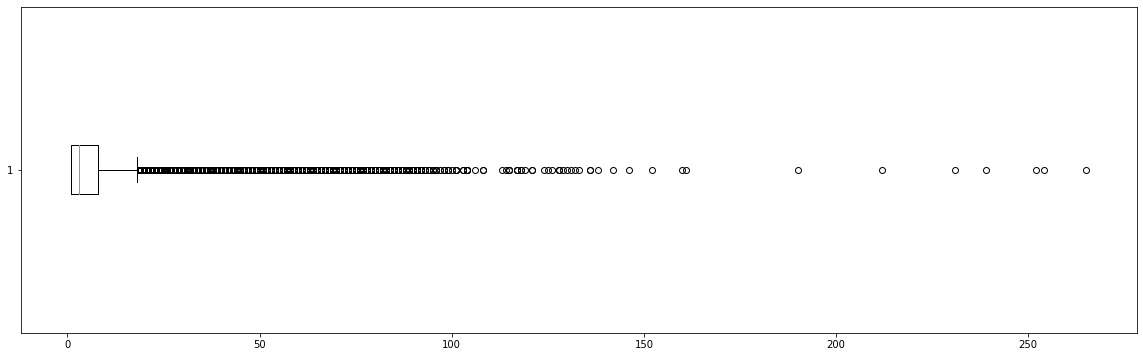

In [149]:
plt.figure(figsize = (20, 6))
plt.boxplot(geo.code, vert=False)

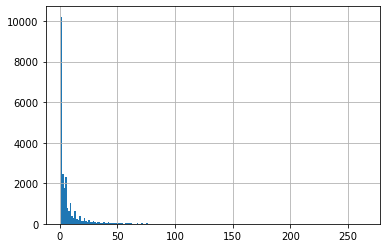

In [151]:
geo.code.hist(bins = 200)

In [9]:
!pip install folium

In [141]:
import folium

m = folium.Map(location=[geo['y'].mean(), geo['x'].mean()], zoom_start = 11)

geo = geo[geo.code >= 100]
geo.code.count()

for i in range(len(geo)):
    entry = geo.iloc[i]
    folium.Marker(location=[entry['y'], entry['x']],
          icon=folium.Icon()
    ).add_to(m)
m

In [11]:
df_orig["ROADCOND"].shape - df_orig["ROADCOND"].value_counts().sum()

array([5012])

In [12]:
df_orig["SDOT_COLDESC"].value_counts()

MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          85209
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    54299
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE          9928
NOT ENOUGH INFORMATION / NOT APPLICABLE                          9787
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                    8856
MOTOR VEHCILE STRUCK PEDESTRIAN                                  6518
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE           5852
MOTOR VEHICLE STRUCK OBJECT IN ROAD                              4741
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE            3104
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE         1604
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE          1440
PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE             1312
MOTOR VEHICLE OVERTURNED IN ROAD                                  479
MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END                       181
PEDALCYCLIST STRUCK 

In [13]:
#"INTKEY", "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT"
df = df_orig.drop(['ST_COLCODE', "INCDTTM", "X", "Y", "JUNCTIONTYPE", "STATUS", "SDOT_COLCODE", "SDOTCOLNUM", "SEVERITYCODE.1","OBJECTID", "INCKEY", "COLDETKEY",  "REPORTNO", "LOCATION", "EXCEPTRSNCODE", 
         "EXCEPTRSNDESC", "SEVERITYDESC", "ST_COLDESC", "SDOT_COLDESC", "ST_COLDESC",
        "INCDATE"], axis = 1)

In [14]:
df.head()

,SEVERITYCODE,ADDRTYPE,INTKEY,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,Intersection,37475.0,Angles,2,0,0,2,NaN,N,Overcast,Wet,Daylight,NaN,NaN,0,0,N
1,1,Block,NaN,Sideswipe,2,0,0,2,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,0,0,N
2,1,Block,NaN,Parked Car,4,0,0,3,NaN,0,Overcast,Dry,Daylight,NaN,NaN,0,0,N
3,1,Block,NaN,Other,3,0,0,3,NaN,N,Clear,Dry,Daylight,NaN,NaN,0,0,N
4,2,Intersection,34387.0,Angles,2,0,0,2,NaN,0,Raining,Wet,Daylight,NaN,NaN,0,0,N


In [15]:
df.columns

Index(['SEVERITYCODE', 'ADDRTYPE', 'INTKEY', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [16]:
for col in df.columns:
    print(col, " = ", df[col].value_counts().count())

SEVERITYCODE  =  2
ADDRTYPE  =  3
INTKEY  =  7614
COLLISIONTYPE  =  10
PERSONCOUNT  =  47
PEDCOUNT  =  7
PEDCYLCOUNT  =  3
VEHCOUNT  =  13
INATTENTIONIND  =  1
UNDERINFL  =  4
WEATHER  =  11
ROADCOND  =  9
LIGHTCOND  =  9
PEDROWNOTGRNT  =  1
SPEEDING  =  1
SEGLANEKEY  =  1955
CROSSWALKKEY  =  2198
HITPARKEDCAR  =  2


[]

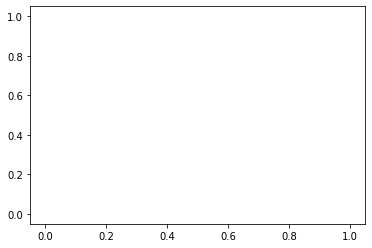

In [139]:
plt.plot()

In [18]:
df["CROSSWALKKEY"].value_counts().count()

2198

In [138]:
df["ST_COLCODE"].value_counts()

KeyError: 'ST_COLCODE'

In [ ]:
df["INATTENTIONIND"].value_counts()

In [ ]:
df.corr()

In [ ]:
df["SEVERITYCODE"].value_counts()